<a href="https://colab.research.google.com/github/anshudhanshu/Startups-Funding-Prediction/blob/main/Sudhanshu_Rawat_Team_5_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [ ]:
!pip install modin

In [ ]:
!pip install modin[all] # Install all of the above

In [1]:
import numpy as np
import pandas as pd
# import os
# os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
# import modin.pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%%time
startups =pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/data_driven_investment_0.csv')

CPU times: user 2.82 s, sys: 376 ms, total: 3.19 s
Wall time: 6.38 s


In [5]:
startups.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


In [6]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502285 entries, 0 to 1502284
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1500803 non-null  object 
 1   month                 1502285 non-null  int64  
 2   Application Category  1502285 non-null  object 
 3   Avg_Session_Time      877763 non-null   float64
 4   Business Models       2750 non-null     object 
 5   City                  2743 non-null     object 
 6   Company Stage         2750 non-null     object 
 7   Feed Name             2750 non-null     object 
 8   Founded Year          2750 non-null     float64
 9   Latest Funded Date    2750 non-null     object 
 10  MAU                   118092 non-null   float64
 11  Open_Rate             877746 non-null   float64
 12  Overview              2750 non-null     object 
 13  Practice Areas        2750 non-null     object 
 14  Reach                 1050970 non-

In [7]:
startups.isnull().sum()

UUID                       1482
month                         0
Application Category          0
Avg_Session_Time         624522
Business Models         1499535
City                    1499542
Company Stage           1499535
Feed Name               1499535
Founded Year            1499535
Latest Funded Date      1499535
MAU                     1384193
Open_Rate                624539
Overview                1499535
Practice Areas          1499535
Reach                    451315
Region                        0
Total Funding (USD)     1499759
Total_Session_Time       624589
Uninstall_Rate          1150001
funding_ind                   0
dtype: int64

In [ ]:
funded_startups = startups[startups['funding_ind']==1]
funded_startups.shape

(2750, 20)

In [ ]:
funded_startups.isnull().sum()

UUID                       0
month                      0
Application Category       0
Avg_Session_Time        1058
Business Models            0
City                       7
Company Stage              0
Feed Name                  0
Founded Year               0
Latest Funded Date         0
MAU                     2291
Open_Rate               1058
Overview                   0
Practice Areas             0
Reach                    794
Region                     0
Total Funding (USD)      224
Total_Session_Time      1058
Uninstall_Rate          1710
funding_ind                0
dtype: int64

In [ ]:
startups.describe()

,month,Avg_Session_Time,Founded Year,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
count,1.502285e+06,877763.000000,2750.000000,118092.000000,877746.000000,1.050970e+06,2.526000e+03,877696.000000,352284.000000,1.502285e+06
mean,2.019719e+07,1.623398,2014.632000,0.398440,3.940700,1.068854e-03,1.270335e+08,5.963753,0.144642,1.830545e-03
std,5.532754e+03,2.253496,4.000254,0.208611,4.537303,1.692271e-02,4.955262e+08,9.593728,0.130946,4.274570e-02
min,2.018070e+07,0.000033,1983.000000,0.000019,1.000000,0.000000e+00,6.200000e+01,0.000033,0.000000,0.000000e+00
25%,2.019120e+07,0.417683,2014.000000,0.235294,1.875000,3.022203e-07,2.014807e+06,1.085491,0.056637,0.000000e+00
50%,2.020030e+07,0.889806,2015.000000,0.388791,2.933333,5.137744e-06,9.973513e+06,2.726576,0.107383,0.000000e+00
75%,2.020040e+07,1.917254,2017.000000,0.546220,4.500000,7.543001e-05,4.187457e+07,6.614369,0.190809,0.000000e+00
max,2.020060e+07,58.561333,2020.000000,1.000000,80.000000,9.990408e-01,7.201430e+09,149.983317,1.000000,1.000000e+00


In [ ]:
startups.describe(include='object')

,UUID,Application Category,Business Models,City,Company Stage,Feed Name,Latest Funded Date,Overview,Practice Areas,Region
count,1500803,1502285,2750,2743,2750,2750,2750,2750,2750,1502285
unique,147741,48,317,31,13,189,251,350,138,1
top,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,Education,Social Platforms > Interest Based > Education ...,Bangalore,Seed,Social Platforms\nTest Preparation Tech,2020-09-25,Q&A-based education community,FinTech,National
freq,2671,202603,232,781,1251,233,232,232,359,1502285


In [ ]:
not_null_avg_time_df=startups[~startups['Avg_Session_Time'].isnull()]

In [ ]:
not_null_avg_time_df.shape

(877763, 20)

In [ ]:
not_null_df = startups.dropna()
not_null_df.shape

(435, 20)

In [ ]:
startups[startups['Company Stage']== 'Series A']['Avg_Session_Time'].median()

0.8452855929031058

In [ ]:
startups[startups['Company Stage']== 'Series B']['Avg_Session_Time'].median()

1.1597418680543208

In [ ]:
startups[startups['Company Stage']== 'Series C']['Avg_Session_Time'].median()

0.9566043956228956

In [ ]:
# Median Avg_Session_Time for each Company Stage
print("Company_Stage  Median Avg_Session_Time")
for stage in startups['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(startups[startups['Company Stage']== stage]['Avg_Session_Time'].median())
  print()

Company_Stage  Median Avg_Session_Time
Series A:	0.8452855929031058

Seed:	1.1466028996847815

Series B:	1.1597418680543208

Series D:	1.1877597818775476

Series C:	0.9566043956228956

Series H:	1.0398141319678857

Acquired:	1.359713622404322

Series J:	nan

Series E:	2.257690865591402

Series I:	0.6084284571679509

Series F:	1.3817414865250521

Funded:	4.015873104070217

Series G:	1.0485492057541907



In [ ]:
# Mean Avg_Session_Time for each Company Stage
print("Company_Stage  Mean Avg_Session_Time")
for stage in startups['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(startups[startups['Company Stage']== stage]['Avg_Session_Time'].mean())
  print()

Company_Stage  Mean Avg_Session_Time
Series A:	1.3716280934024514

Seed:	1.87132003701909

Series B:	2.1865301918938616

Series D:	1.5445236571738787

Series C:	1.566963894546688

Series H:	1.0699148538314946

Acquired:	1.4737326445464154

Series J:	nan

Series E:	1.5992154684920021

Series I:	0.6347854630185972

Series F:	1.347736590610043

Funded:	4.073137388757522

Series G:	1.067974072279323



In [ ]:
# Median Uninstall Rate for each Company Stage
print("Company_Stage  Mean Uninstall Rate")
for stage in startups['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(startups[startups['Company Stage']== stage]['Uninstall_Rate'].median())
  print()

Company_Stage  Mean Uninstall Rate
Series A:	0.12569832402234635

Seed:	0.12335299630630134

Series B:	0.12108472543107551

Series D:	0.11162735287109836

Series C:	0.1311475409836066

Series H:	0.11724137931034485

Acquired:	0.10476190476190472

Series J:	0.07699154428126387

Series E:	0.09417539806946618

Series I:	0.09819979108918059

Series F:	0.10332950631458092

Funded:	0.07275132275132273

Series G:	0.0650521656998872



In [ ]:
# Mean Uninstall Rate for each Company Stage
print("Company_Stage  Mean Uninstall Rate")
for stage in startups['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(startups[startups['Company Stage']== stage]['Uninstall_Rate'].mean())
  print()

Company_Stage  Mean Uninstall Rate
Series A:	0.13603426038798164

Seed:	0.15612784639131766

Series B:	0.1792365939546728

Series D:	0.12469005848941926

Series C:	0.14414882574361904

Series H:	0.10950911243866461

Acquired:	0.12213158231566766

Series J:	0.08320118129035962

Series E:	0.09792365921542732

Series I:	0.0952301291732481

Series F:	0.1615591730296482

Funded:	0.07275132275132273

Series G:	0.08537016811071932



In [ ]:
categories = startups['Application Category'].unique()

In [ ]:
Stages = startups['Company Stage'].unique()

### **Analysing UUID**

In [ ]:
startups['UUID'].describe()

count                                      1500803
unique                                      147741
top       4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27
freq                                          2671
Name: UUID, dtype: object

In [ ]:
startups['UUID'].isnull().sum()

1482

In [ ]:
startups[startups['UUID'].isnull()].isnull().sum()

UUID                    1482
month                      0
Application Category       0
Avg_Session_Time         816
Business Models         1482
City                    1482
Company Stage           1482
Feed Name               1482
Founded Year            1482
Latest Funded Date      1482
MAU                     1424
Open_Rate                816
Overview                1482
Practice Areas          1482
Reach                    382
Region                     0
Total Funding (USD)     1482
Total_Session_Time       816
Uninstall_Rate          1298
funding_ind                0
dtype: int64

In [ ]:
startups[~startups['UUID'].isnull()].isnull().sum()

UUID                          0
month                         0
Application Category          0
Avg_Session_Time         623706
Business Models         1498053
City                    1498060
Company Stage           1498053
Feed Name               1498053
Founded Year            1498053
Latest Funded Date      1498053
MAU                     1382769
Open_Rate                623723
Overview                1498053
Practice Areas          1498053
Reach                    450933
Region                        0
Total Funding (USD)     1498277
Total_Session_Time       623773
Uninstall_Rate          1148703
funding_ind                   0
dtype: int64

In [ ]:
startups['UUID'].value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2671
a8febb4b767f83022235f3f34a2241ed1e13db2f    1778
524889f05a60933210abde13d9db9211986698ac    1575
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1531
10a07f3aa16935a1b5a79c0d19bf5e4044cd5f21    1282
                                            ... 
16a36e58ed132ab3bd2cd01d6249d6b1b7db3d21       1
9834a8a858760e64f5195b60e1a807ec1f16e3f2       1
bb464bf3eb09eeefd201dabc972a15e923007a61       1
c4dfb1bd10b116bfce0ca2368d268a17cea52b90       1
333fddf6f8a96b356912af8ca55e94f35596d802       1
Name: UUID, Length: 147741, dtype: int64

In [ ]:
startups['Company Stage'].unique()

array([nan, 'Series A', 'Seed', 'Series B', 'Series D', 'Series C',
       'Series H', 'Acquired', 'Series J', 'Series E', 'Series I',
       'Series F', 'Funded', 'Series G'], dtype=object)

In [ ]:
startups[startups['Company Stage']  == 'Series A' ].dropna()['Total Funding (USD)']

30713       5588693.0
32144       6483790.0
32898      10422240.0
32977      19022522.0
35416      14996449.0
              ...    
1418498    12331649.0
1418499    12331649.0
1418500    12331649.0
1419670    11544081.0
1421441    12331649.0
Name: Total Funding (USD), Length: 79, dtype: float64

In [ ]:
startups[startups['Company Stage']  == 'Series A' ]['Total Funding (USD)'].mean()

15556360.92204301

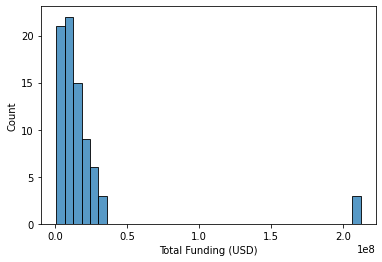

In [ ]:
sns.histplot(startups[startups['Company Stage']  == 'Series A' ].dropna()['Total Funding (USD)'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


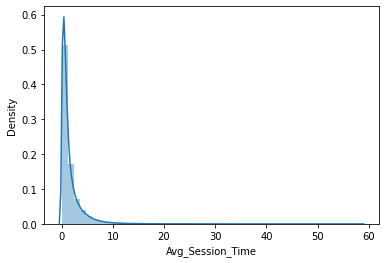

In [ ]:
sns.distplot(not_null_avg_time_df.Avg_Session_Time)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


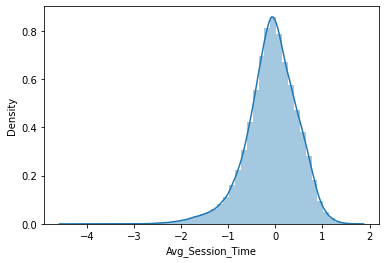

In [ ]:
sns.distplot(np.log10(not_null_avg_time_df.Avg_Session_Time))

In [ ]:
null_avg_time = startups[startups['Avg_Session_Time'].isnull()]
null_avg_time.head(30)

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0
5,3d82666e19078799205cee6998a6c5dd8b6add2a,20180801,Travel & Local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000927,National,NaN,NaN,0.094488,0
6,7dd8f8918e91940bb6f8af0b4889fedaf421d0db,20180801,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000280,National,NaN,NaN,0.096774,0
7,029c8ea1565578af1d3a79dfd186ad6e590ce362,20180801,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000514,National,NaN,NaN,0.134831,0
8,08a19c746c758161bc0436f74163f5e206dad50b,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000021,National,NaN,NaN,0.000000,0
9,0d30ce53c1f76f5ee21425b461ebf28e82728505,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000260,National,NaN,NaN,0.114754,0


In [ ]:
null_avg_time.shape

(624522, 20)

In [ ]:
null_avg_time.isnull().sum()

UUID                       816
month                        0
Application Category         0
Avg_Session_Time        624522
Business Models         623464
City                    623467
Company Stage           623464
Feed Name               623464
Founded Year            623464
Latest Funded Date      623464
MAU                     624481
Open_Rate               624460
Overview                623464
Practice Areas          623464
Reach                      113
Region                       0
Total Funding (USD)     623595
Total_Session_Time      624483
Uninstall_Rate          384661
funding_ind                  0
dtype: int64

In [ ]:
null_avg_time['funding_ind'].value_counts()

0    623464
1      1058
Name: funding_ind, dtype: int64

UUID

  ['c1ad38e2d357610c129657d870ede902e8abfcb9'
 'd841e670d9191f896a0cbc75961920887b375756'
 '0a59d138b3eaccd22b665eae70c756fef83ddb63' ...
 'edcbe5f1ad6b3c0400e60d38a07a5cdaabc4b1a8'
 'e9f9a92b05dbb720db6d49a85b2ed243fe373ccd'
 '6495e1a3ddf8ac88f119ba60eb5880da263d588c']
month

  [20180801 20190601 20191201 20200301 20190201 20200201 20190301 20200601
 20180901 20190701 20181201 20190801 20190901 20180701 20181001 20181101
 20191001 20200101 20200501 20190401 20200401 20190501 20191101 20190101]
Application Category

  ['Books & Reference' 'Finance' 'Productivity' 'Travel & Local' 'Education'
 'Health & Fitness' 'Lifestyle' 'Music & Audio' 'Medical' 'Business'
 'Maps & Navigation' 'Social' 'Shopping' 'Tools' 'Puzzle' 'Adventure'
 'Sports' 'Casual' 'Food & Drink' 'Art & Design' 'Entertainment' 'Card'
 'Racing' 'Photography' 'Board' 'Role Playing' 'Action' 'Simulation'
 'Strategy' 'Educational' 'News & Magazines' 'Video Players & Editors'
 'Personalization' 'Weather' 'Communication'

### **D**

checking for duplicated and dropping them.

In [ ]:
startups.duplicated().sum()

89460

In [ ]:
# dropping ALL duplicte values 
new_df = startups.drop_duplicates()
new_df.shape 

(1412825, 20)

In [ ]:
total_features = list(new_df.columns)
total_features

['UUID',
 'month',
 'Application Category',
 'Avg_Session_Time',
 'Business Models',
 'City',
 'Company Stage',
 'Feed Name',
 'Founded Year',
 'Latest Funded Date',
 'MAU',
 'Open_Rate',
 'Overview',
 'Practice Areas',
 'Reach',
 'Region',
 'Total Funding (USD)',
 'Total_Session_Time',
 'Uninstall_Rate',
 'funding_ind']

In [ ]:
usable_features = ['UUID',
 'month',
 'Application Category',
 'Avg_Session_Time',
 'Open_Rate',
 'Reach',
 'Total_Session_Time',
 'funding_ind']

In [ ]:
clf_df = new_df[usable_features]

In [ ]:
clf_df.head()

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,0.042963,NaN,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,0.003244,NaN,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,0.000161,NaN,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,0.000077,NaN,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,0.000939,NaN,0


Checking for null values

In [ ]:
clf_df.isnull().sum()

UUID                       969
month                        0
Application Category         0
Avg_Session_Time        535062
Open_Rate               535079
Reach                   451315
Total_Session_Time      535129
funding_ind                  0
dtype: int64

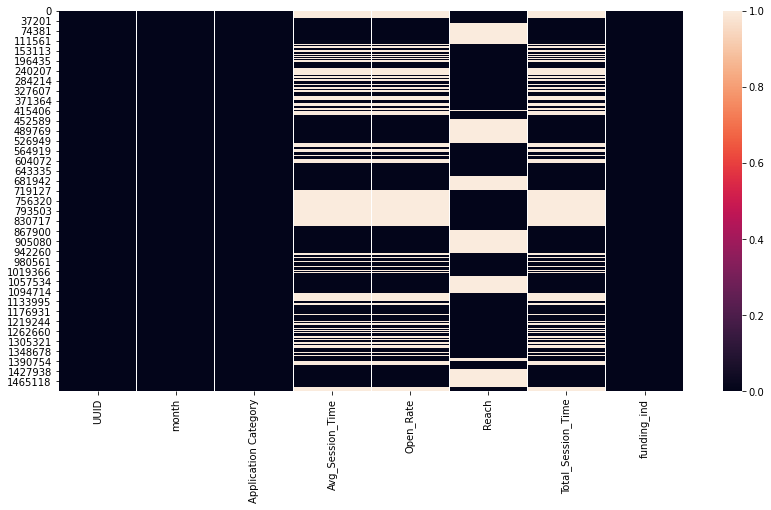

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(clf_df.isnull())

In [ ]:
clf_df[clf_df['funding_ind'] == 1].UUID.isnull().sum()

0

In [ ]:
clf_df[clf_df['funding_ind'] == 0].UUID.isnull().sum()

969

In [ ]:
clf_df =clf_df[~clf_df['UUID'].isnull()] 

In [ ]:
clf_df[clf_df['funding_ind'] == 0].UUID.isnull().sum()

0

In [46]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

In [ ]:
def changeTodate(x):
  month = str(x)[4:6]
  day = str(x)[6:]
  year = str(x)[0:4]
  date = day+'/'+month+'/'+year
  return int(day),int(month),int(year),date
  # return pd.to_datetime(date,format='dd/mm/yy')


In [ ]:
clf_df['observed day'] = clf_df['month'].apply(lambda x:changeTodate(x)[0])
clf_df['observed month'] = clf_df['month'].apply(lambda x: changeTodate(x)[1])
clf_df['observed year'] = clf_df['month'].apply(lambda x: changeTodate(x)[2])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def fill_missing(dataframe):
  new_data = pd.DataFrame(columns=dataframe.columns)
  Category_list = dataframe['Application Category'].value_counts().index.to_list()
  years = dataframe['observed year'].value_counts().index.to_list()
  for i in Category_list:
    temp = dataframe[dataframe['Application Category']==i]
    for y in years:
      temp1 = temp[temp['observed year']==y]
      temp1.fillna(method='ffill', limit = 2, inplace = True)
      temp1.fillna(method='backfill', limit = 1, inplace = True)
      new_data = pd.concat([new_data, temp1])
  
  new_data_1 = pd.DataFrame(columns=dataframe.columns)
  for i in Category_list:
    temp = new_data[new_data['Application Category']==i]
    for y in years:
      temp1 = temp[temp['observed year']==y]
      temp1.fillna(temp1.mean(), inplace = True)
      new_data_1 = pd.concat([new_data_1, temp1])

  Final_data = pd.DataFrame(columns=dataframe.columns)  
  for i in Category_list:
    temp = new_data_1[new_data_1['Application Category']==i]
    temp.fillna(temp.mean(), inplace = True)
    Final_data = pd.concat([Final_data, temp])

  return Final_data

In [ ]:
final_df = fill_missing(clf_df)

In [ ]:
final_df.head()

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,observed day,observed month,observed year
125726,615ff89844fb9b8804559eedab5f13f569b8c63c,20200301,Education,0.799037,3.571429,9.860441e-06,3.285362,0,1,3,2020
125731,4096f9f35c2efe32751614b5de6ca4966d770b41,20200301,Education,0.799037,3.571429,1.972088e-07,3.285362,0,1,3,2020
125760,ea1d85c85770124a6ec1904843f066a3a7d09b0a,20200301,Education,0.799037,3.571429,1.972088e-07,3.285362,0,1,3,2020
125771,c495446fe78d349ba3a51b12029d4343e4ed8001,20200301,Education,1.504116,3.131962,1.972088e-07,4.991207,0,1,3,2020
125776,caf0ec13bb28fc975d5c3a1fabed988c753c7af2,20200301,Education,1.504116,3.131962,1.972088e-07,4.991207,0,1,3,2020


In [ ]:
final_df.to_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/cleaned_data.csv',index=False)

In [14]:
cleaned_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/cleaned_data.csv')
cleaned_df.head()

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,observed day,observed month,observed year
0,615ff89844fb9b8804559eedab5f13f569b8c63c,20200301,Education,0.799037,3.571429,9.860441e-06,3.285362,0,1,3,2020
1,4096f9f35c2efe32751614b5de6ca4966d770b41,20200301,Education,0.799037,3.571429,1.972088e-07,3.285362,0,1,3,2020
2,ea1d85c85770124a6ec1904843f066a3a7d09b0a,20200301,Education,0.799037,3.571429,1.972088e-07,3.285362,0,1,3,2020
3,c495446fe78d349ba3a51b12029d4343e4ed8001,20200301,Education,1.504116,3.131962,1.972088e-07,4.991207,0,1,3,2020
4,caf0ec13bb28fc975d5c3a1fabed988c753c7af2,20200301,Education,1.504116,3.131962,1.972088e-07,4.991207,0,1,3,2020


In [15]:
cleaned_df.drop(['observed day','month'],axis=1,inplace=True)

In [16]:
cleaned_df.isna().sum()

UUID                    0
Application Category    0
Avg_Session_Time        0
Open_Rate               0
Reach                   0
Total_Session_Time      0
funding_ind             0
observed month          0
observed year           0
dtype: int64

In [31]:
month_wise_df= cleaned_df.groupby(['UUID','Application Category','observed month','observed year']).mean().reset_index()
month_wise_df.head()

,UUID,Application Category,observed month,observed year,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind
0,000066f130e3b972364c505c805e2cddee68816d,Business,3,2020,0.770633,3.322581,1.972088e-07,2.770216,0
1,000066f130e3b972364c505c805e2cddee68816d,Business,4,2020,1.422606,1.666667,3.022203e-07,2.793617,0
2,000066f130e3b972364c505c805e2cddee68816d,Business,6,2020,1.106979,4.333333,4.889378e-06,2.576717,0
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,4,2020,0.595371,6.166667,3.022203e-07,3.845703,0
4,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2,2020,1.471044,3.000000,9.665592e-04,4.413133,0


In [52]:
UUID_value_count_df = month_wise_df.UUID.value_counts().reset_index()
UUID_value_count_df = UUID_value_count_df.rename(columns={'index':'UUID','UUID':'value_counts'})
indx = UUID_value_count_df[(UUID_value_count_df['value_counts'] == 1) | (UUID_value_count_df['value_counts'] == 2)].UUID.index

In [53]:
new_df = month_wise_df.drop(indx)


In [54]:
new_df.shape

(888618, 9)

In [55]:
new_df.funding_ind.value_counts()

0    887183
1      1435
Name: funding_ind, dtype: int64

In [32]:
month_wise_df.funding_ind.value_counts()

0    943655
1      1529
Name: funding_ind, dtype: int64

In [56]:
new_df[new_df['funding_ind']==1]

,UUID,Application Category,observed month,observed year,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind
402,0022cb351d65829b6604dac5347f5a94c9a458b4,Finance,8,2019,0.973182,4.105739,0.000102,4.058006,1
404,0022cb351d65829b6604dac5347f5a94c9a458b4,Finance,9,2019,0.973182,4.105739,0.000111,4.058006,1
406,0022cb351d65829b6604dac5347f5a94c9a458b4,Finance,10,2019,0.973182,4.105739,0.000134,4.058006,1
473,002a227d76dec56e6fd80868a72b198d74b27418,Shopping,2,2020,1.684031,5.395269,0.000725,9.009780,1
475,002a227d76dec56e6fd80868a72b198d74b27418,Shopping,3,2020,1.377684,3.839242,0.000574,5.108240,1
...,...,...,...,...,...,...,...,...,...
936594,fd964943c01a84bc2c54d747f6bd9bbf162c1673,Business,6,2020,0.728288,54.839357,0.000156,40.831801,1
940647,fecd7c1ab55bf429eb709bdc07e2b95dc8df61d3,Casual,4,2020,2.140412,6.085648,0.000043,12.777813,1
940648,fecd7c1ab55bf429eb709bdc07e2b95dc8df61d3,Casual,5,2020,4.447131,6.692118,0.000133,32.388855,1
940649,fecd7c1ab55bf429eb709bdc07e2b95dc8df61d3,Casual,6,2020,3.923142,5.044077,0.000103,20.330275,1


In [57]:
new_df[new_df['funding_ind']==0]

,UUID,Application Category,observed month,observed year,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind
0,000066f130e3b972364c505c805e2cddee68816d,Business,3,2020,0.770633,3.322581,1.972088e-07,2.770216,0
1,000066f130e3b972364c505c805e2cddee68816d,Business,4,2020,1.422606,1.666667,3.022203e-07,2.793617,0
2,000066f130e3b972364c505c805e2cddee68816d,Business,6,2020,1.106979,4.333333,4.889378e-06,2.576717,0
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,4,2020,0.595371,6.166667,3.022203e-07,3.845703,0
4,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2,2020,1.471044,3.000000,9.665592e-04,4.413133,0
...,...,...,...,...,...,...,...,...,...
945179,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,6,2020,1.516300,1.000000,4.610266e-05,1.516300,0
945180,ffff74dbc24df592b6355be32f5a71adeefb3b48,Finance,4,2020,0.774724,3.364751,6.044405e-07,2.954551,0
945181,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,Casual,2,2020,0.062117,1.000000,2.110230e-04,0.062117,0
945182,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,Casual,3,2020,7.180876,3.467236,1.972088e-07,28.323236,0


In [65]:
never_funded_index = []
def check_funded_cat(x):
  if x in not_funded_cat:

    never_funded_index.append(new_df[new_df['Application Category']==x].index)

     

In [ ]:

new_df['Application Category'].apply(check_funded_cat)

In [62]:
# month_wise_df[month_wise_df['funding_ind']==1]

In [34]:
month_wise_df['observed month'].unique()

array([ 3,  4,  6,  2,  5, 12,  1, 11,  7,  8,  9, 10])

### **Understanding `Funding_ind`**

0    1409302
1       2554
Name: funding_ind, dtype: int64


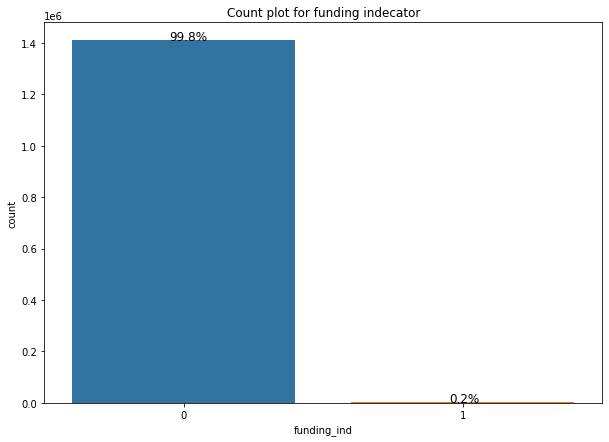

In [48]:
print(cleaned_df['funding_ind'].value_counts())
fig, ax = plt.subplots(figsize =(10, 7)) 
ax = sns.countplot(x=cleaned_df['funding_ind'])
plt.title("Count plot for funding indecator")
perc_on_bar(ax,cleaned_df["funding_ind"])

* *The dataset lookes highly imbalanced*

### **understanding `month`**

In [ ]:
clf_df.month.unique()

array([20180801, 20190601, 20191201, 20200301, 20190201, 20200201,
       20190301, 20200601, 20180901, 20190701, 20181201, 20190801,
       20190901, 20180701, 20181001, 20181101, 20191001, 20200101,
       20200501, 20190401, 20200401, 20190501, 20191101, 20190101])

In [ ]:
clf_df.month.describe()

count    1.411856e+06
mean     2.019699e+07
std      5.644440e+03
min      2.018070e+07
25%      2.019120e+07
50%      2.020030e+07
75%      2.020040e+07
max      2.020060e+07
Name: month, dtype: float64

In [ ]:
clf_df['month'].apply(lambda x: changeTodate(x)[2])

0          2018
1          2018
2          2018
3          2018
4          2018
           ... 
1502280    2019
1502281    2019
1502282    2019
1502283    2019
1502284    2019
Name: month, Length: 1411856, dtype: int64

In [ ]:
changeTodate(20180801)[0]

1

In [ ]:
clf_df.head()

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,observed date,observed day,observed month,observed year
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,0.042963,NaN,0,2018-01-08,1,8,2018
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,0.003244,NaN,0,2018-01-08,1,8,2018
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,0.000161,NaN,0,2018-01-08,1,8,2018
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,0.000077,NaN,0,2018-01-08,1,8,2018
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,0.000939,NaN,0,2018-01-08,1,8,2018


In [ ]:
clf_df['Observed_year'] = clf

### **Understanding `Application category`**

In [60]:
total_cat = cleaned_df['Application Category'].unique()
print(total_cat)
print(f'Length: {len(total_cat)}')

['Education' 'Tools' 'Business' 'Books & Reference' 'Entertainment'
 'Productivity' 'Finance' 'Photography' 'Personalization' 'Music & Audio'
 'Lifestyle' 'Social' 'Communication' 'Health & Fitness' 'Travel & Local'
 'Shopping' 'Simulation' 'News & Magazines' 'Casual' 'Action'
 'Video Players & Editors' 'Puzzle' 'Sports' 'Arcade' 'Medical'
 'Educational' 'Maps & Navigation' 'Racing' 'Food & Drink' 'Adventure'
 'Art & Design' 'Auto & Vehicles' 'Role Playing' 'Board' 'Card' 'Strategy'
 'Weather' 'House & Home' 'Word' 'Events' 'Dating' 'Trivia' 'Beauty'
 'Comics' 'Casino' 'Music' 'Parenting' 'Libraries & Demo']
Length: 48


In [58]:
# Application categories that are funded
funded_cat = cleaned_df[cleaned_df['funding_ind']==1]['Application Category'].unique()
print(funded_cat)
print(f'Length: {len(funded_cat)}')


['Education' 'Tools' 'Business' 'Books & Reference' 'Entertainment'
 'Productivity' 'Finance' 'Photography' 'Personalization' 'Music & Audio'
 'Lifestyle' 'Social' 'Communication' 'Health & Fitness' 'Travel & Local'
 'Shopping' 'Simulation' 'News & Magazines' 'Casual' 'Action'
 'Video Players & Editors' 'Puzzle' 'Sports' 'Arcade' 'Medical'
 'Educational' 'Maps & Navigation' 'Racing' 'Food & Drink' 'Adventure'
 'Auto & Vehicles' 'Role Playing' 'Board' 'Card' 'Strategy' 'Weather'
 'House & Home' 'Trivia' 'Beauty' 'Comics' 'Parenting']
Length: 41


In [61]:
# Application categories that are not funded so far
not_funded_cat =  [ele for ele in total_cat if ele not in funded_cat]
print(not_funded_cat) 
print(len(not_funded_cat))

['Art & Design', 'Word', 'Events', 'Dating', 'Casino', 'Music', 'Libraries & Demo']
7


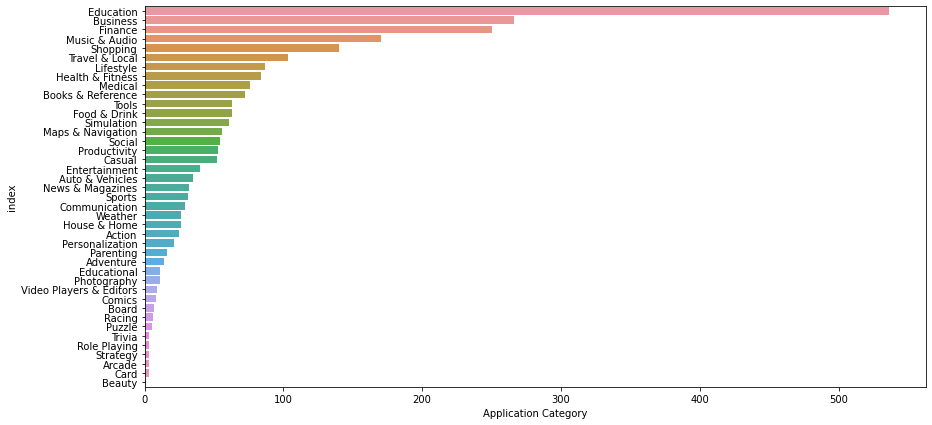

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(x = 'Application Category',y = 'index',data =cleaned_df[cleaned_df['funding_ind']==1]['Application Category'].value_counts().reset_index())

In [ ]:
clf_df['Avg_Session_Time'].describe()

count    877097.000000
mean          1.623716
std           2.253572
min           0.000033
25%           0.417860
50%           0.890115
75%           1.917746
max          58.561333
Name: Avg_Session_Time, dtype: float64

In [ ]:
cleaned_df['Avg_Session_Time'].describe()

count    1.411856e+06
mean     1.567898e+00
std      2.003959e+00
min      3.333333e-05
25%      5.235612e-01
50%      9.778198e-01
75%      1.722726e+00
max      5.856133e+01
Name: Avg_Session_Time, dtype: float64

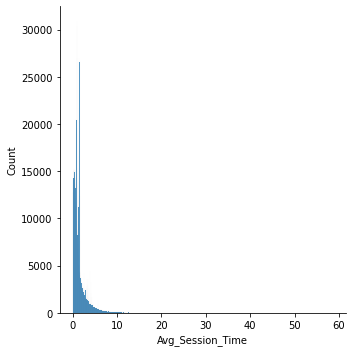

In [ ]:
sns.displot(cleaned_df['Avg_Session_Time'])

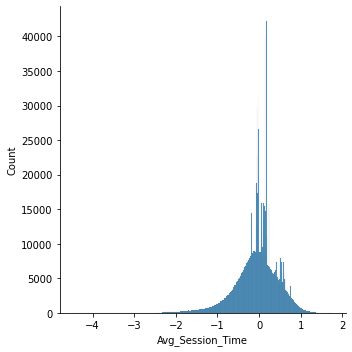

In [ ]:
sns.displot(np.log10(cleaned_df['Avg_Session_Time']))

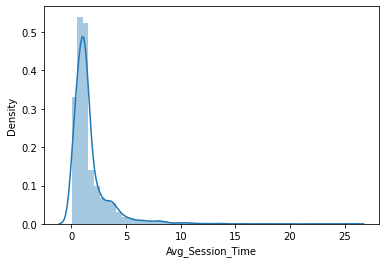

In [ ]:
sns.distplot(cleaned_df[cleaned_df['funding_ind']==1]['Avg_Session_Time'])

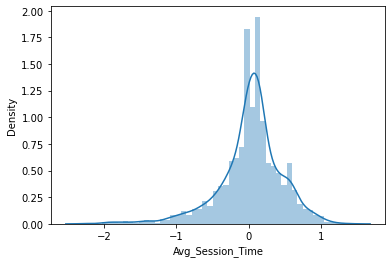

In [ ]:
sns.distplot(np.log10(cleaned_df[cleaned_df['funding_ind']==1]['Avg_Session_Time']))

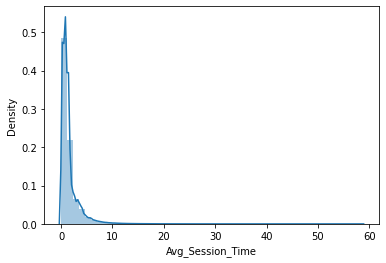

In [ ]:
sns.distplot(cleaned_df[cleaned_df['funding_ind']==0]['Avg_Session_Time'])

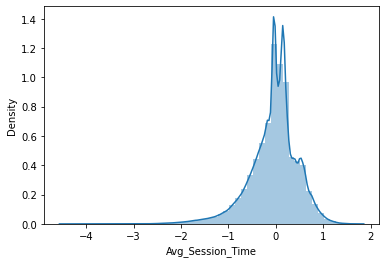

In [ ]:
sns.distplot(np.log10(cleaned_df[cleaned_df['funding_ind']==0]['Avg_Session_Time']))

In [ ]:
not_funded_cat

[0          False
 1          False
 2          False
 3          False
 4          False
            ...  
 1502280    False
 1502281    False
 1502282    False
 1502283    False
 1502284    False
 Name: Application Category, Length: 1411856, dtype: bool]

In [ ]:
clf_df.UUID.value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2654
a8febb4b767f83022235f3f34a2241ed1e13db2f    1670
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1529
ec1cd22193eda5ec91905247ea3079ae84e2dd30    1224
03fb932e41ef68f1df45e0b20f326de05ebd438c    1086
                                            ... 
664aa660b24bbfde19579838f56335913e8556e6       1
6101e98a205000be9ab068d95ebfc1fd0f32acf7       1
e839d4f917cd833b6273d33a06f4e354ac65fec1       1
8429682b40a3f6a30a46a091ca032f3c6402b7d2       1
75945505cc6e1858b38aede39e8ddc95f87ef78f       1
Name: UUID, Length: 147741, dtype: int64